# Explore here

In [59]:
! pip install pmdarima
! pip install calplot
import warnings 

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calplot as cal
import plotly.express as px
import math
import zipfile
import os
import numpy as np

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
#import pmdarima
#from pmdarima import auto_arima
from colorama import Fore, init
from math import sqrt


In [70]:
zip_file_path = '/Users/nandapop/.kaggle/acea-water-prediction.zip'
extract_to_path = '/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/data/raw'
if not os.path.exists(extract_to_path):
    os.makedirs(extract_to_path)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

In [71]:
df = pd.read_csv("~/Documents/Bootcamp/alternative_time_series_project/data/raw/Aquifer_Petrignano.csv", parse_dates=['Date'], dayfirst=True)
df.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,2006-03-14,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,2006-03-15,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,2006-03-16,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,2006-03-17,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,2006-03-18,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


EDA

In [36]:
df.shape

(5223, 8)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  5223 non-null   datetime64[ns]
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64       
 2   Depth_to_Groundwater_P24              5168 non-null   float64       
 3   Depth_to_Groundwater_P25              5184 non-null   float64       
 4   Temperature_Bastia_Umbra              4199 non-null   float64       
 5   Temperature_Petrignano                4199 non-null   float64       
 6   Volume_C10_Petrignano                 5025 non-null   float64       
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 326.6 KB


In [38]:
df.describe()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,5223,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,2013-05-07 00:00:00,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
min,2006-03-14 00:00:00,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,2009-10-09 12:00:00,0.000000,-28.250000,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,2013-05-07 00:00:00,0.000000,-25.990000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,2016-12-02 12:00:00,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,2020-06-30 00:00:00,67.300000,-19.660000,-19.100000,33.000000,31.100000,0.000000,4.100000
std,NaN,5.217923,3.319858,3.214165,7.794871,7.701369,4751.864371,0.589088


In [39]:
df.isnull().sum()

Date                                       0
Rainfall_Bastia_Umbra                   1024
Depth_to_Groundwater_P24                  55
Depth_to_Groundwater_P25                  39
Temperature_Bastia_Umbra                1024
Temperature_Petrignano                  1024
Volume_C10_Petrignano                    198
Hydrometry_Fiume_Chiascio_Petrignano    1024
dtype: int64

In [40]:
df_clean = df.dropna()

In [41]:
df_clean = df_clean.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1)

In [42]:
df_clean.isnull().sum()

Date                                    0
Rainfall_Bastia_Umbra                   0
Depth_to_Groundwater_P25                0
Temperature_Bastia_Umbra                0
Volume_C10_Petrignano                   0
Hydrometry_Fiume_Chiascio_Petrignano    0
dtype: int64

In [43]:
type(df_clean['Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [44]:
df_clean.head()

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
1024,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4
1025,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5
1026,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4
1027,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4
1028,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3


Visualization

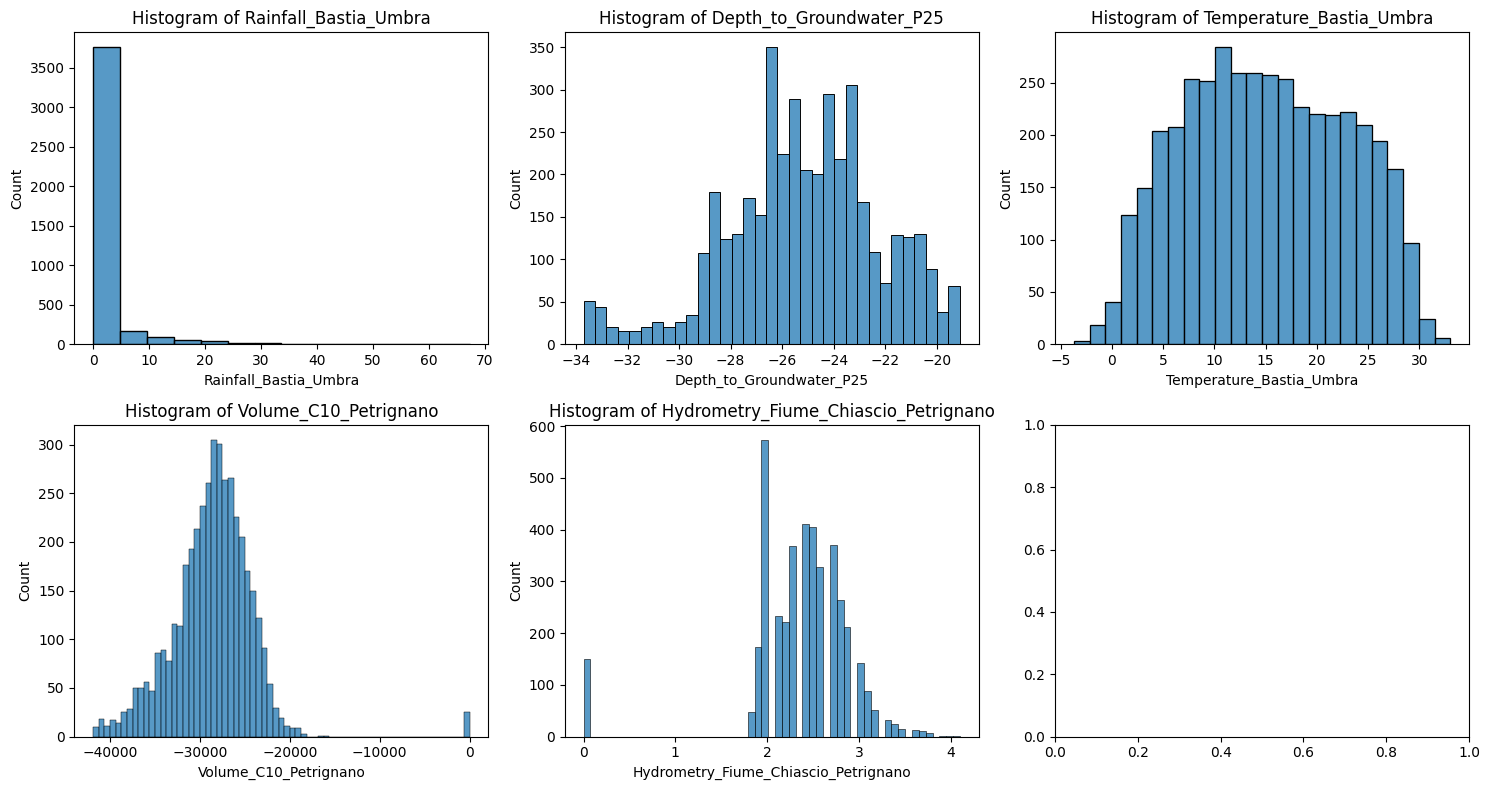

In [72]:
numeric_columns = df_clean.select_dtypes(include=np.number)
num_cols = 3
num_rows = (len(numeric_columns.columns) + num_cols - 1) // num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))
axes = axes.flatten()
for i, col in enumerate(numeric_columns.columns):
    sns.histplot(data=df_clean, x=col, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    plt.savefig(f".../Documents/Bootcamp/alternative_time_series_project/data/data_num_{col}.png")
plt.tight_layout()
plt.show()

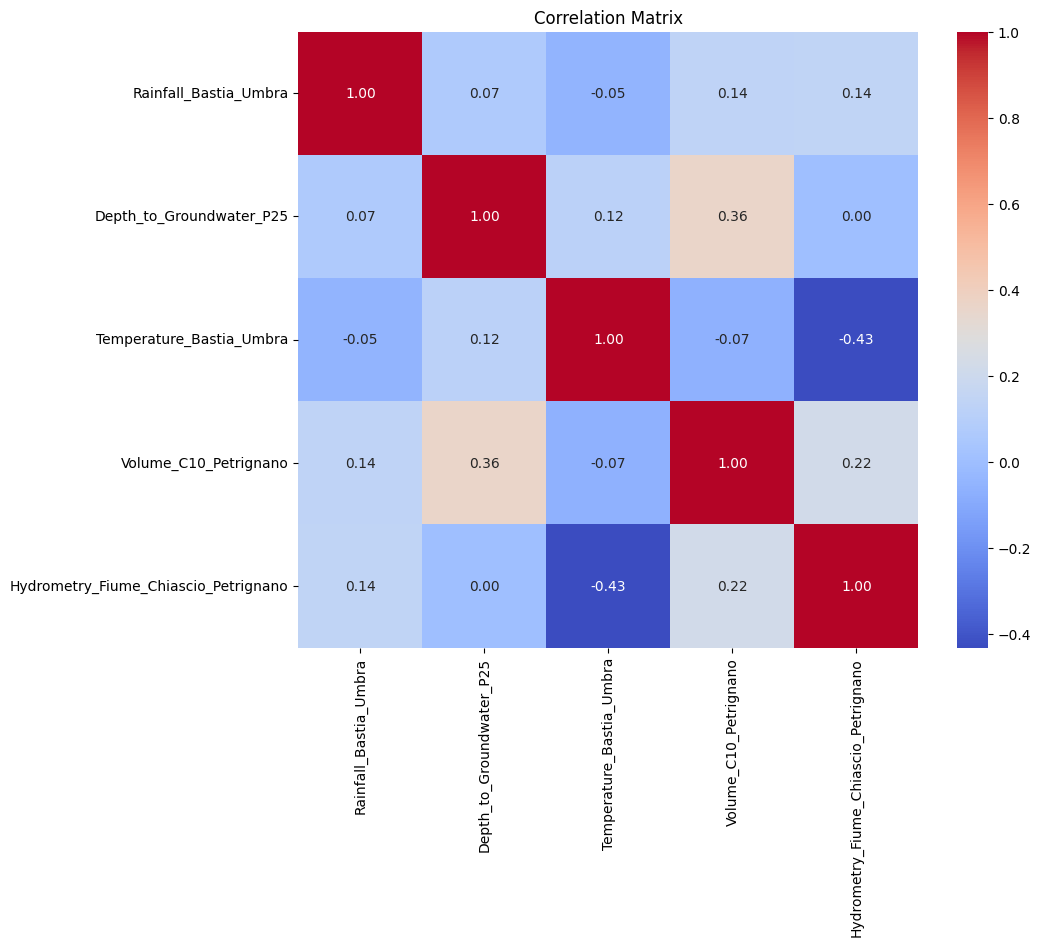

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig(f".../Documents/Bootcamp/alternative_time_series_project/data/corr_matrix.png")
plt.show()

Stationary Check

In [47]:
target = df_clean['Depth_to_Groundwater_P25']
result = adfuller(target.values)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] < 0.05:
        print("The time series is stationary.")
else:
        print("The time series is non-stationary.")

ADF Statistic: -2.888518020053135
p-value: 0.04669958018312443
The time series is stationary.


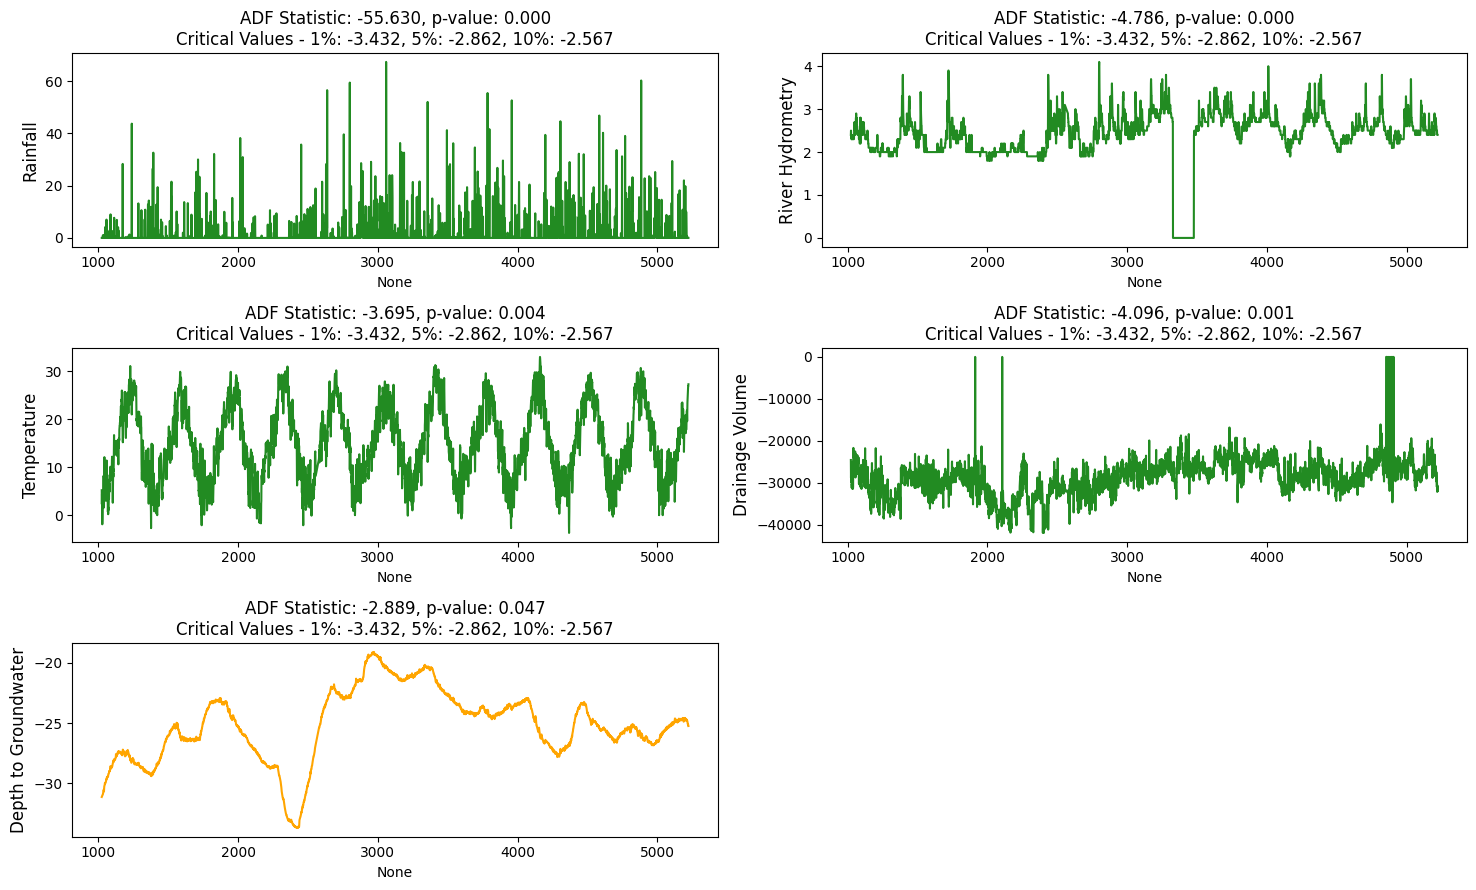

In [77]:
def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]  # ADF statistic
    p_val = result[1]  # p-value
    crit_vals = result[4]  # Critical values for 1%, 5%, and 10%

    # Determine line color based on ADF results
    if p_val < significance_level and adf_stat < crit_vals['1%']:
        linecolor = 'forestgreen'  # Strong rejection of null hypothesis (stationary)
    elif p_val < significance_level and adf_stat < crit_vals['5%']:
        linecolor = 'orange'  # Moderate rejection of null hypothesis (stationary)
    elif p_val < significance_level and adf_stat < crit_vals['10%']:
        linecolor = 'red'  # Weak rejection of null hypothesis (stationary)
    else:
        linecolor = 'purple'  # Failed to reject null hypothesis (non-stationary)
    
    # Plot the time series with the determined color
    sns.lineplot(x=series.index, y=series, ax=ax, color=linecolor)
    
    # Set the title with ADF statistic, p-value, and critical values
    ax.set_title(f'ADF Statistic: {adf_stat:.3f}, p-value: {p_val:.3f}\n'
                 f'Critical Values - 1%: {crit_vals["1%"]:.3f}, 5%: {crit_vals["5%"]:.3f}, 10%: {crit_vals["10%"]:.3f}', 
                 fontsize=12)
    
    # Label the y-axis
    ax.set_ylabel(title, fontsize=12)

# Create a 3x2 grid of subplots
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

# Visualize the ADF test results for each series
visualize_adfuller_results(df_clean['Rainfall_Bastia_Umbra'], 'Rainfall', ax[0, 0])
visualize_adfuller_results(df_clean['Temperature_Bastia_Umbra'], 'Temperature', ax[1, 0])
visualize_adfuller_results(df_clean['Hydrometry_Fiume_Chiascio_Petrignano'], 'River Hydrometry', ax[0, 1])
visualize_adfuller_results(df_clean['Volume_C10_Petrignano'], 'Drainage Volume', ax[1, 1])
visualize_adfuller_results(df_clean['Depth_to_Groundwater_P25'], 'Depth to Groundwater', ax[2, 0])

fig.delaxes(ax[2, 1])
plt.savefig(".../Documents/Bootcamp/alternative_time_series_project/data/visualization.png")
plt.tight_layout()
plt.show()

Decomposing time series (trend, seasonal, and residual)

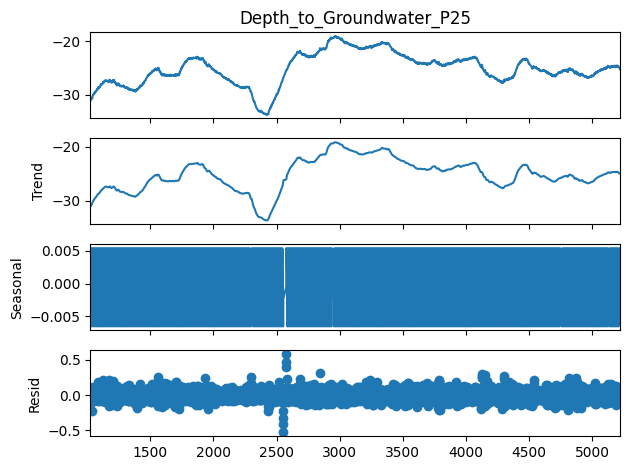

In [49]:
decomposition = seasonal_decompose(df_clean['Depth_to_Groundwater_P25'].dropna(), model='additive', period=12)
decomposition.plot()
plt.show()

Time Series Analysis

In [50]:
def create_rolling_windows(df_clean, window_size='3Y', forecast_horizon='30D'):
   
    window_start_dates = pd.date_range(start=df_clean['Date'].min(), end=df_clean['Date'].max() - pd.Timedelta(window_size), freq=forecast_horizon)
    
    rolling_windows = []
    for start_date in window_start_dates:
        end_date = start_date + pd.Timedelta(window_size)
        forecast_date = end_date + pd.Timedelta(forecast_horizon)
        
        # Define the training and testing datasets within the window
        train_df = df.loc[df_clean['Date'].between(start_date, end_date)]
        test_df = df.loc[df_clean['Date'].between(end_date, forecast_date)]
        
        rolling_windows.append((train_df, test_df))
        
    return rolling_windows

Modelling

In [51]:
target = 'Depth_to_Groundwater_P25'
y = df_clean['Depth_to_Groundwater_P25']
X = df_clean.drop(columns=['Depth_to_Groundwater_P25'])

In [52]:
N_SPLITS = 3
folds = TimeSeriesSplit(n_splits=N_SPLITS)

for i, (train_index, test_index) in enumerate(folds.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    print(f"Fold {i+1}")
    print(f"TRAIN indices: {train_index[:5]}...{train_index[-5:]}")
    print(f"TEST indices: {test_index[:5]}...{test_index[-5:]}")
    print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
    print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}\n")

last_fold = list(folds.split(X))[-1]
train_index, test_index = last_fold

X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]


Fold 1
TRAIN indices: [0 1 2 3 4]...[1034 1035 1036 1037 1038]
TEST indices: [1039 1040 1041 1042 1043]...[2071 2072 2073 2074 2075]
X_train shape: (1039, 5), X_test shape: (1037, 5)
y_train shape: (1039,), y_test shape: (1037,)

Fold 2
TRAIN indices: [0 1 2 3 4]...[2071 2072 2073 2074 2075]
TEST indices: [2076 2077 2078 2079 2080]...[3108 3109 3110 3111 3112]
X_train shape: (2076, 5), X_test shape: (1037, 5)
y_train shape: (2076,), y_test shape: (1037,)

Fold 3
TRAIN indices: [0 1 2 3 4]...[3108 3109 3110 3111 3112]
TEST indices: [3113 3114 3115 3116 3117]...[4145 4146 4147 4148 4149]
X_train shape: (3113, 5), X_test shape: (1037, 5)
y_train shape: (3113,), y_test shape: (1037,)



In [53]:
'''I couldn't 'be able to fix this error: 
autoarima ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject"'''
#arima_model = auto_arima(y_train, seasonal=False, stepwise=True, trace=False) 

'I couldn\'t \'be able to fix this error: \nautoarima ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject"'

In [54]:
model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps=len(y_test))
mae = mean_absolute_error(y_test, forecast)
rmse = np.sqrt(mean_squared_error(y_test, forecast))

/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

Final Fold - MAE: 0.8615068926580858, RMSE: 1.0702701354831576


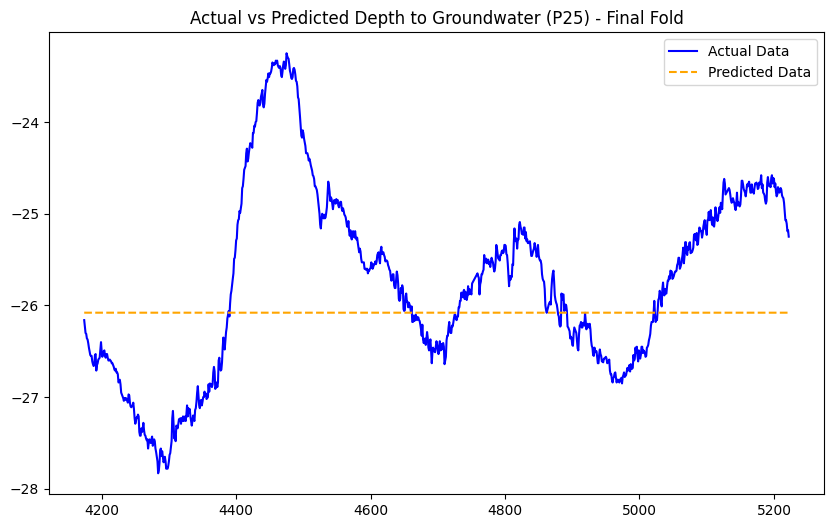

In [78]:
last_fold = list(folds.split(X))[-1]
train_index, test_index = last_fold

X_train, X_test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y.iloc[train_index], y.iloc[test_index]

model = ARIMA(y_train, order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=len(y_test))

final_mae = mean_absolute_error(y_test, forecast)
final_rmse = np.sqrt(mean_squared_error(y_test, forecast))

print(f"Final Fold - MAE: {final_mae}, RMSE: {final_rmse}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual Data", color='blue')
plt.plot(y_test.index, forecast, label="Predicted Data", color='orange', linestyle='--')
plt.title("Actual vs Predicted Depth to Groundwater (P25) - Final Fold")
plt.savefig(".../Documents/Bootcamp/alternative_time_series_project/data/final_fold_mae.png")
plt.legend()
plt.show()

ARIMA tune hyperparameters

In [56]:
p_values = [0, 1, 2]
d_values = [0, 1]
q_values = [0, 1, 2]

best_rmse = float('inf')
best_order = None
results = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            print(f'Trying ARIMA({p},{d},{q})')
            model = ARIMA(y_train, order=(p, d, q))
            model_fit = model.fit()
            forecast = model_fit.fittedvalues
            rmse = np.sqrt(mean_squared_error(y_train, forecast))
            print(f'ARIMA({p},{d},{q}) RMSE: {rmse}')
            results.append((p, d, q, rmse))
            if rmse < best_rmse:
                best_rmse = rmse
                best_order = (p, d, q)

Trying ARIMA(0,0,0)
ARIMA(0,0,0) RMSE: 3.3351475015438075
Trying ARIMA(0,0,1)


/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

ARIMA(0,0,1) RMSE: 1.6911890076017582
Trying ARIMA(0,0,2)


/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

ARIMA(0,0,2) RMSE: 0.9211753612905781
Trying ARIMA(0,1,0)
ARIMA(0,1,0) RMSE: 0.5621608018224593
Trying ARIMA(0,1,1)
ARIMA(0,1,1) RMSE: 0.5620227211848448
Trying ARIMA(0,1,2)


/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

ARIMA(0,1,2) RMSE: 0.562022553422392
Trying ARIMA(1,0,0)
ARIMA(1,0,0) RMSE: 0.12914894742862326
Trying ARIMA(1,0,1)


/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

ARIMA(1,0,1) RMSE: 0.12854432959674617
Trying ARIMA(1,0,2)


/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

ARIMA(1,0,2) RMSE: 0.1285444663749632
Trying ARIMA(1,1,0)
ARIMA(1,1,0) RMSE: 0.562023924264212
Trying ARIMA(1,1,1)
ARIMA(1,1,1) RMSE: 0.5620225887455388
Trying ARIMA(1,1,2)


/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

ARIMA(1,1,2) RMSE: 0.5620223377658595
Trying ARIMA(2,0,0)


/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

ARIMA(2,0,0) RMSE: 0.1285555562484998
Trying ARIMA(2,0,1)


/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

ARIMA(2,0,1) RMSE: 0.10014075064947661
Trying ARIMA(2,0,2)


/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

ARIMA(2,0,2) RMSE: 0.1277592845037799
Trying ARIMA(2,1,0)
ARIMA(2,1,0) RMSE: 0.5620231474141002
Trying ARIMA(2,1,1)


/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

ARIMA(2,1,1) RMSE: 0.5620207978309458
Trying ARIMA(2,1,2)


/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/Users/nandapop/Documents/Bootcamp/alternative_time_series_project/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self

ARIMA(2,1,2) RMSE: 0.5618505360079518


In [57]:
print(f'Best ARIMA order: {best_order} with RMSE: {best_rmse}')

Best ARIMA order: (2, 0, 1) with RMSE: 0.10014075064947661


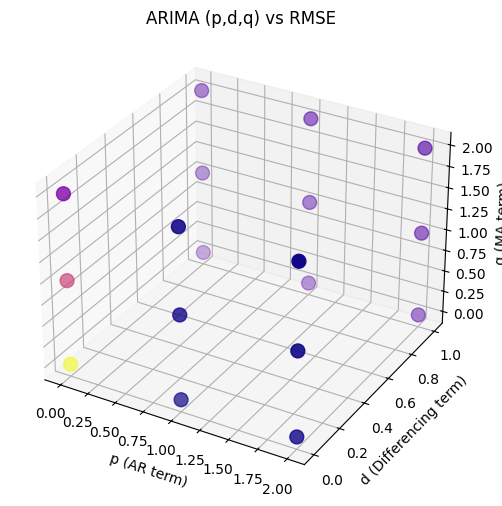

In [79]:
results_df = pd.DataFrame(results, columns=['p', 'd', 'q', 'rmse'])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_df['p'], results_df['d'], results_df['q'], c=results_df['rmse'], cmap='plasma', s=100)

ax.set_xlabel('p (AR term)')
ax.set_ylabel('d (Differencing term)')
ax.set_zlabel('q (MA term)')
ax.set_title('ARIMA (p,d,q) vs RMSE')
plt.savefig(".../Documents/Bootcamp/alternative_time_series_project/data/3d_model.png")
plt.show()